# <b><u> Project Title : Sentiment Analysis : Predicting sentiment of COVID-19 tweets</u></b>

**Project Type** - Classification                                                               
**Contribution** - Individual                                                    
**Team Member** - Kritika Sharma


<b> Problem Description </b>                                                                 
This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.                                               
The names and usernames are have been given coded to avoid any privacy concerns.

**GitHub Link**

##IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer

In [3]:
#Model libraries
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import cross_val_score

In [4]:
# Sklearn Libraries
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import PassiveAggressiveClassifier

In [5]:
## Download stopwords

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Data

In [7]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capstone Project 3/Coronavirus Tweets.csv', encoding = "ISO-8859-1", engine='python')

In [8]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [9]:
data.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [10]:
data.shape

(41157, 6)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


##EDA SUMMARY

1)Original Dataset contains 6 columns and 41157 rows.                            
2)Location column contains approx 21% of Null values. so, we have dropped the NaN values.                                                                      
3)After dropping we have left with 32567 rows and 6 columns.                     
4)In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment".                                                                    
5)The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.                                                       
6)There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.                                                 
7)All tweets data collected from the months of March and April 2020. Bar plot shows us the number of unique values in each column.                             
8)Most of the tweets came from London followed by U.S

In [12]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


We see that location column has nan values

In [14]:
# Checking the % of Null values and duplicate values if any
print(data.isnull().sum()/len(data)*100)

UserName          0.000000
ScreenName        0.000000
Location         20.871298
TweetAt           0.000000
OriginalTweet     0.000000
Sentiment         0.000000
dtype: float64


We see that the location columns has about 21% of null values

In [15]:
# Drooping Null values from the dataset
data.dropna(inplace=True)

In [16]:
# Dataset shape after dropping null rows
data.shape

(32567, 6)

In [17]:
#There are 12220 unique locations from where tweet came
data.Location.value_counts()

London                          540
United States                   528
London, England                 520
New York, NY                    395
Washington, DC                  373
                               ... 
Staffordshire Moorlands           1
Kithchener ON                     1
Tulsa, Ok                         1
Watford, South Oxhey, Bushey      1
i love you so much || he/him      1
Name: Location, Length: 12220, dtype: int64

In [18]:
# There are 5 unique Sentiment
data['Sentiment'].value_counts()

Positive              9110
Negative              7763
Neutral               6172
Extremely Positive    5273
Extremely Negative    4249
Name: Sentiment, dtype: int64

<Axes: >

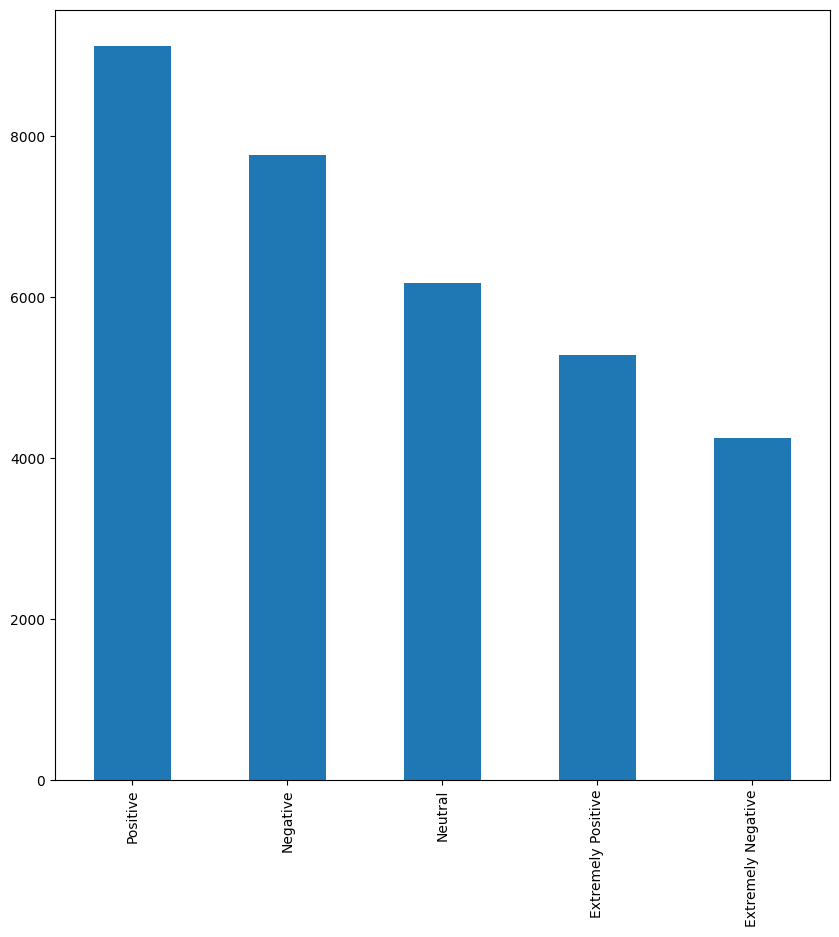

In [19]:
plt.figure(figsize=(10,10))
data.Sentiment.value_counts().plot.bar()

1. **Why did you pick the specific chart?**                                      
A bar chart shows value counts for different variables and I picked this chart to see number of sentiments.

2. **What is/are the insight(s) found from the chart?**                          
I found that 9110 people have positive sentiment which means maximum followed by negative 7736 people.

3. **Will the gained insights help creating a positive business impact?**        
Are there any insights that lead to negative growth? Justify with specific reason.
Yes , the gained insights will help creating a positive business while making prediction.

##Graphical representation of sentiment column

In [20]:
sentiment_count = data['Sentiment'].value_counts().reset_index()
sentiment_count.columns=['Sentiment','count']
sentiment_count

,Sentiment,count
0,Positive,9110
1,Negative,7763
2,Neutral,6172
3,Extremely Positive,5273
4,Extremely Negative,4249


Text(0, 0.5, 'Count')

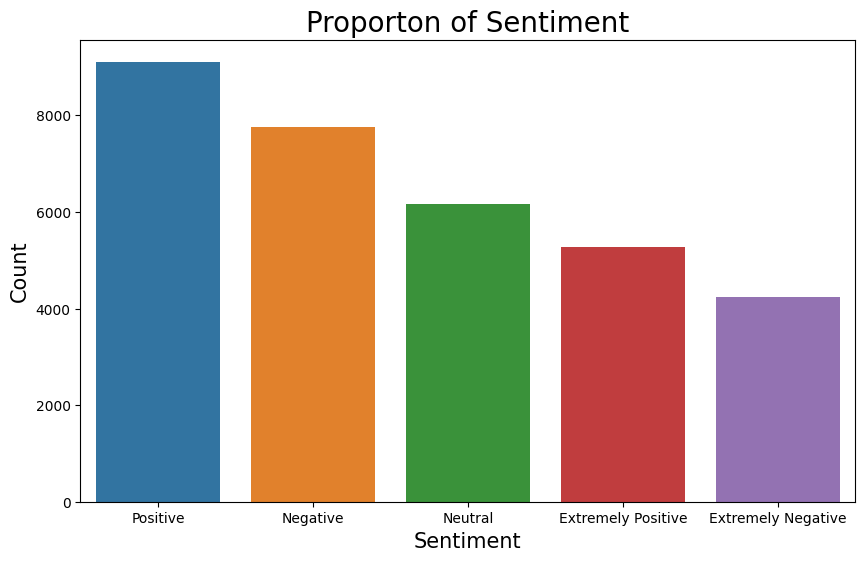

In [21]:
plt.figure(figsize=(10,6))
ax = sns.barplot(x="Sentiment", y= 'count', data=sentiment_count)
ax.set_title('Proporton of Sentiment', fontsize=20)
ax.set_xlabel("Sentiment",fontsize=15)
ax.set_ylabel("Count",fontsize=15)

##Unique value in each feature columns

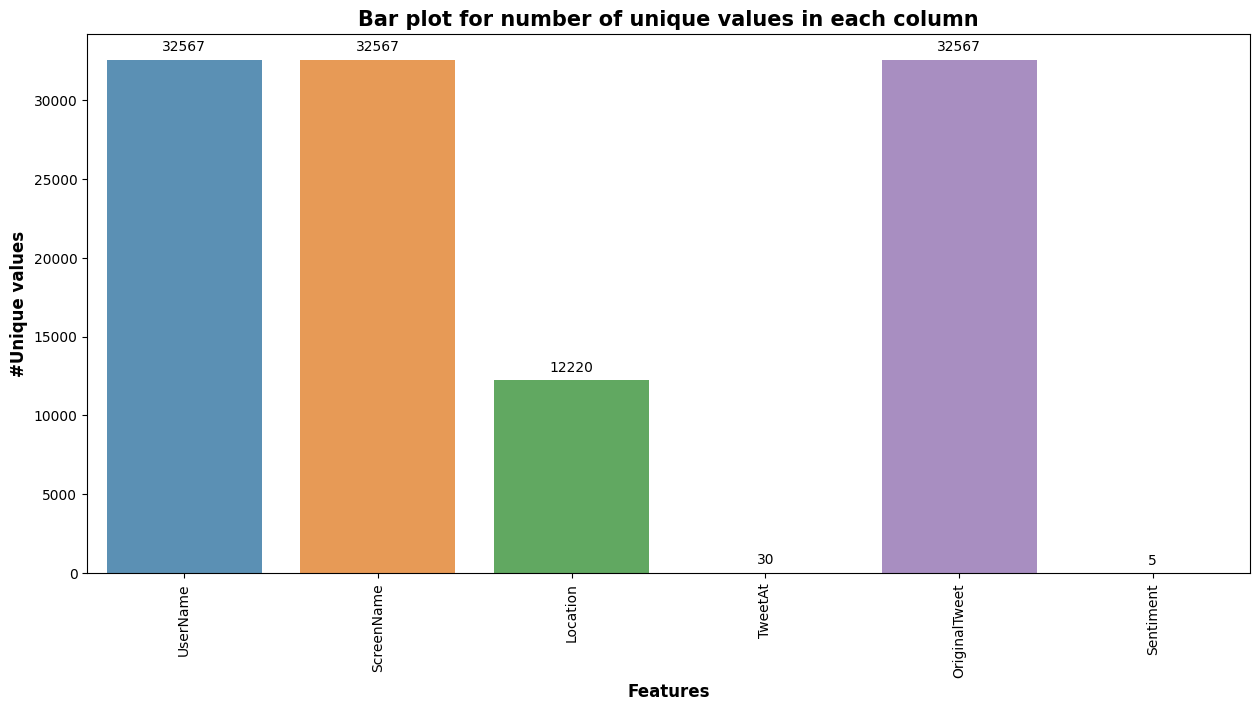

In [22]:
unique_df=pd.DataFrame()
unique_df['Features']=data.columns
unique=[]
for i in data.columns:
  unique.append(data[i].nunique())
unique_df['Uniques']=unique



f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('#Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

**What is/are the insight(s) found from the chart?**

> 1- Every user have their individual Username and Screenname.  
2- Many users belongs to single  locations.                                      
3- There are 30 different date on which tweet is done.                                                                                                                   
 4- There are only unique 5 types of sentiments.





##CountPlot for OriginalTweet according to "TweetAt" column

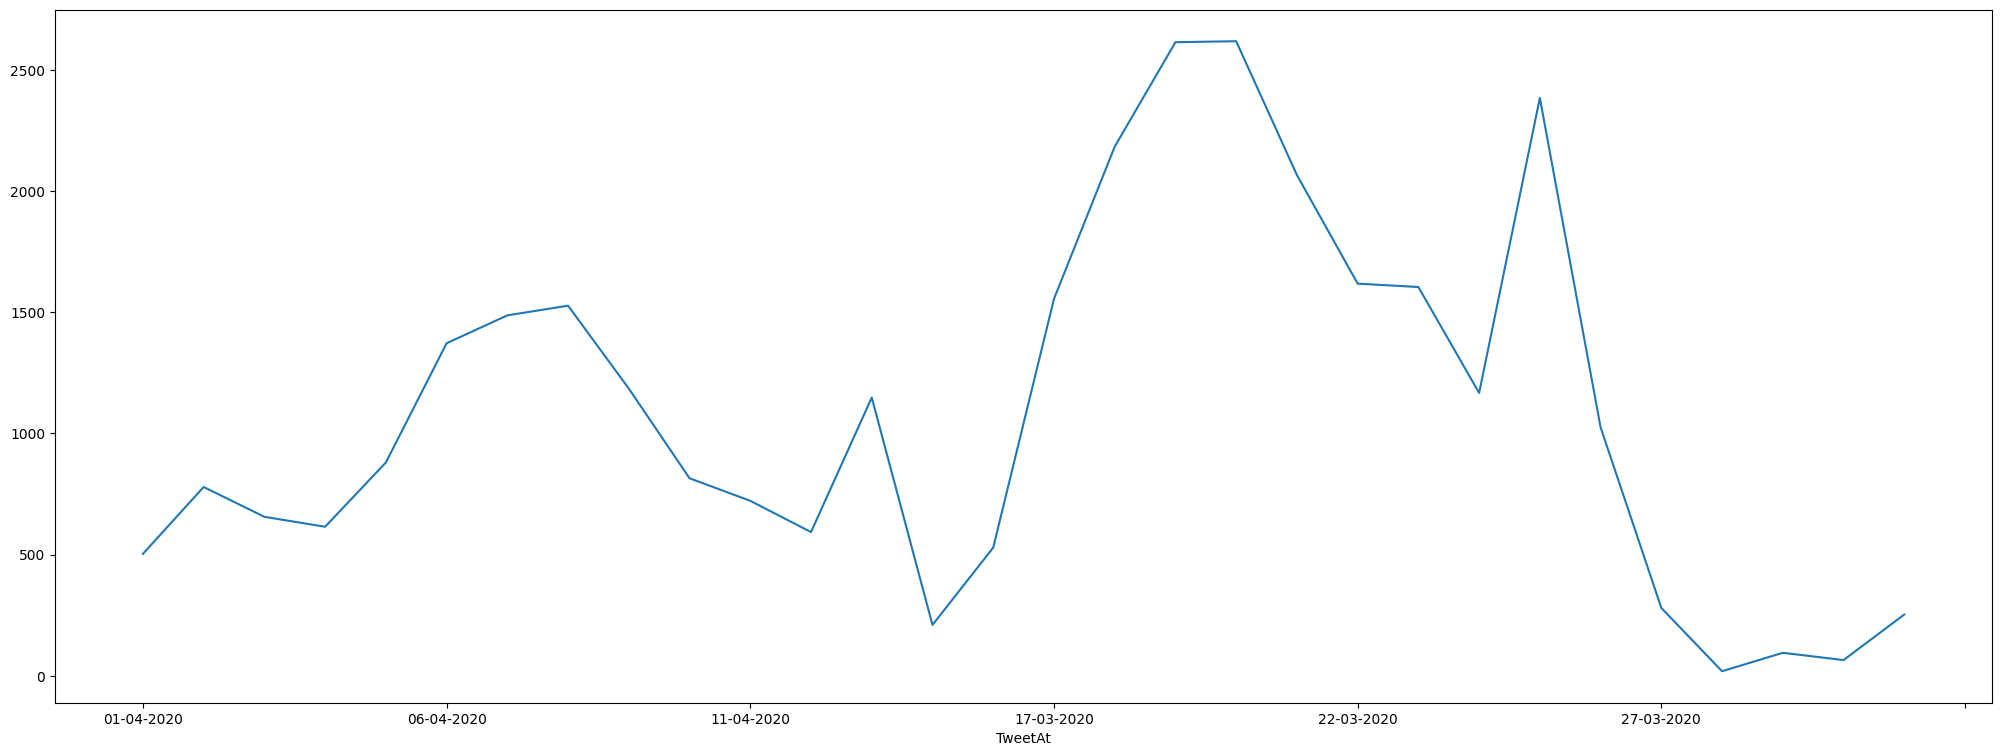

In [23]:
plt.figure(figsize=(25,9))
grp_tweetAt=data.groupby('TweetAt').count()['OriginalTweet'].plot()
plt.show()

**1. Why did you pick the specific chart?**                                      
A line chart represents asset's historical price action that connects a series of data points with a continuous line.so I picked this chart to see constant flow of tweets at respective date.

**2. What is/are the insight(s) found from the chart?**                          
I found that between 17-Mar-20 to 22-Mar-20 there were maximum number of tweets.


## Histogram plot of the length of OriginalTweet.

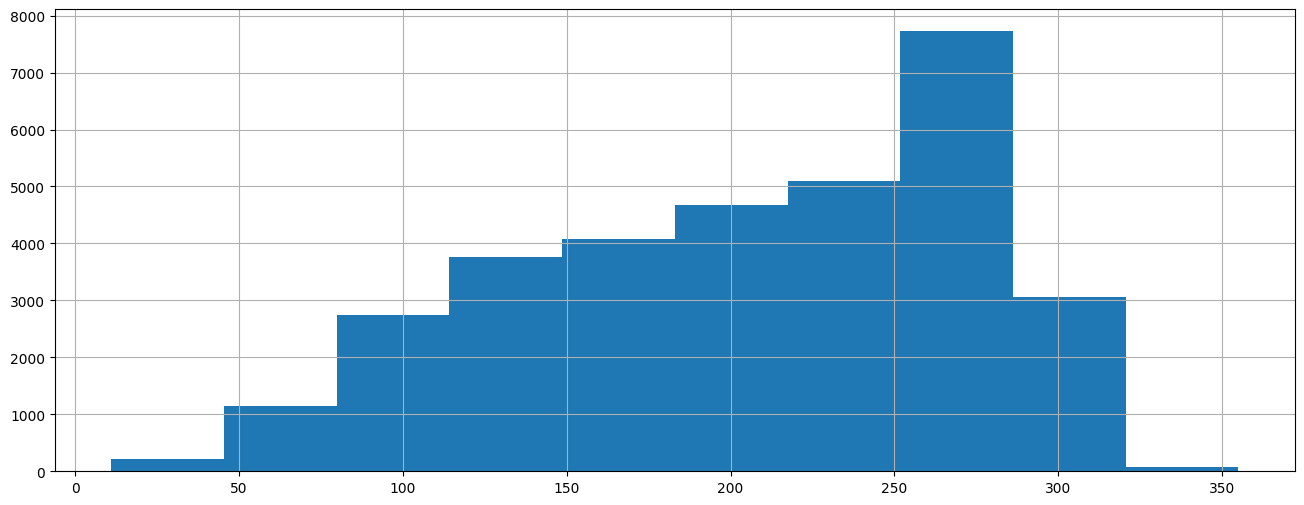

In [24]:
plt.figure(figsize=(16,6))
plt.grid()

plt.hist(data['OriginalTweet'].str.len())
plt.show()

##Top 10 Location

In [25]:
location_top10 = data['Location'].value_counts()[:10]
location_top10

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

<Axes: xlabel='Location', ylabel='count'>

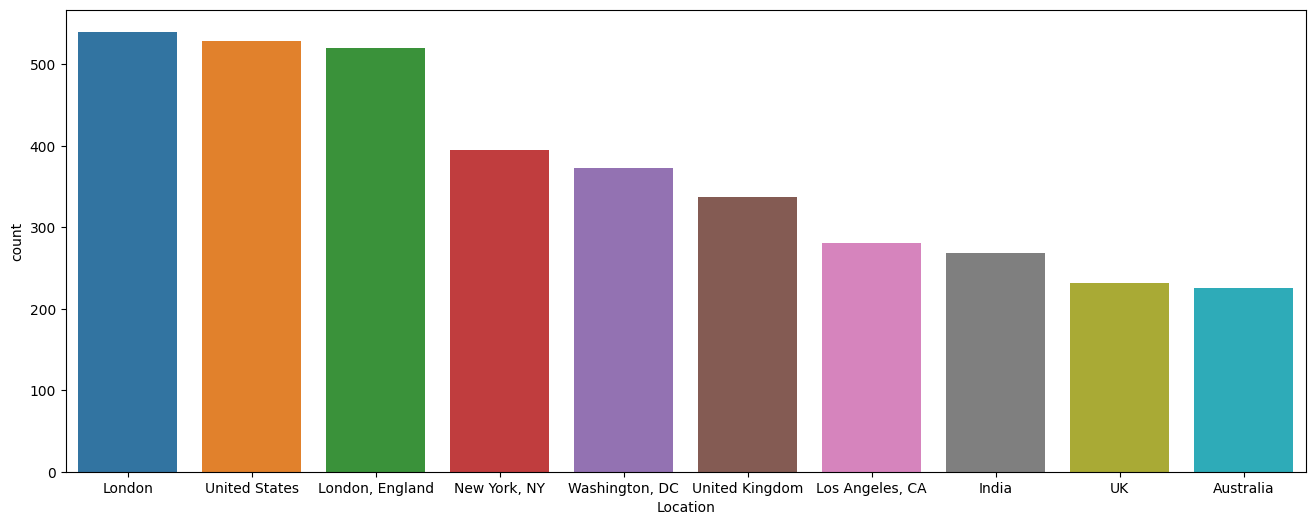

In [26]:
plt.figure(figsize=(16,6))
sns.countplot(data=data[data['Location'].isin(location_top10.index)], x='Location',order=location_top10.index)

<b>What is/are the insight(s) found from the chart?</b>                      
                                                                               We see that maximum number of tweets are being done from London followed by US and London.

##Replacing Sentiments Values

In [27]:
replace_values = {"Sentiment": {'Extremely Negative' : 'Negative', 'Extremely Positive' : 'Positive'}}
data = data.replace(replace_values)

In [28]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


In [29]:
sentiment_count2 = data['Sentiment'].value_counts().reset_index()
sentiment_count2.columns=['Sentiment','count']
sentiment_count2

,Sentiment,count
0,Positive,14383
1,Negative,12012
2,Neutral,6172


Text(0, 0.5, 'Count')

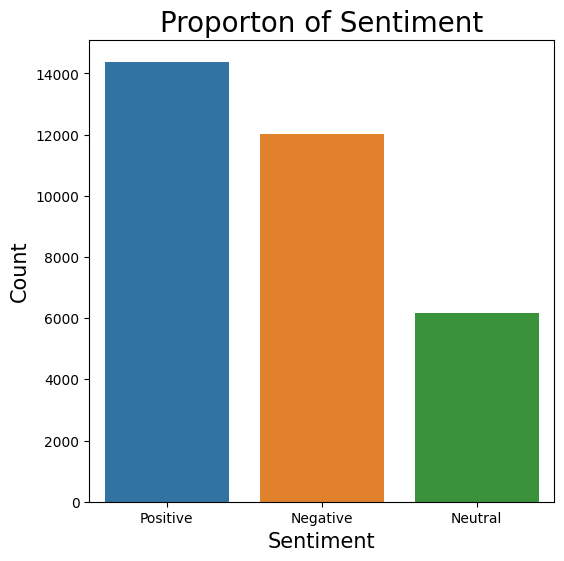

In [30]:
plt.figure(figsize=(6,6))
ax2 = sns.barplot(x="Sentiment", y= 'count', data=sentiment_count2)
ax2.set_title('Proporton of Sentiment', fontsize=20)
ax2.set_xlabel("Sentiment",fontsize=15)
ax2.set_ylabel("Count",fontsize=15)


**What is/are the insight(s) found from the chart?**                                 
 Most of the tweets indicates towards Positive sentiments whereas least of them are Neutral.

##Replacing Sentiments

In [31]:
# replacing values
replace_values = {"Sentiment":{'Extremely Negative':'Negative', 'Extremely Positive':'Positive'}}
data = data.replace(replace_values)

In [32]:
sentiment_count1 = data['Sentiment'].value_counts().reset_index()
sentiment_count1.columns = ['Sentiment','count']
sentiment_count1

,Sentiment,count
0,Positive,14383
1,Negative,12012
2,Neutral,6172


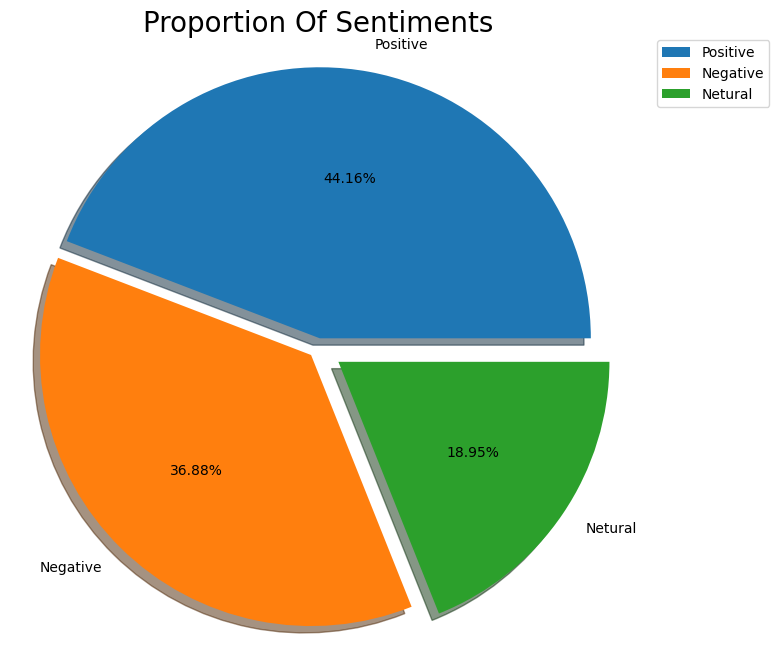

In [33]:
# Plotting the piechart for Sentiments distribution
sentiment_count1 = data['Sentiment'].value_counts().to_list()
labels=['Positive','Negative','Netural']
plt.figure(figsize=(10,8))
plt.pie(x=sentiment_count1,explode=[0.04,0.04,0.1],shadow= True,labels=labels,autopct="%.2f%%",radius=1.1)
plt.title("Proportion Of Sentiments", fontsize=20)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

**What is/are the insight(s) found from the chart?**                             
We combined Extremly Positive and Negative sentiments to positive and negative sentiments respectively. As we can observe on the Pie-Plot, The total number of "Positive" sentiments are still high after combining

**We use a package wordcloud to display the number of words and their importance in the 'OriginalTweet' column.**



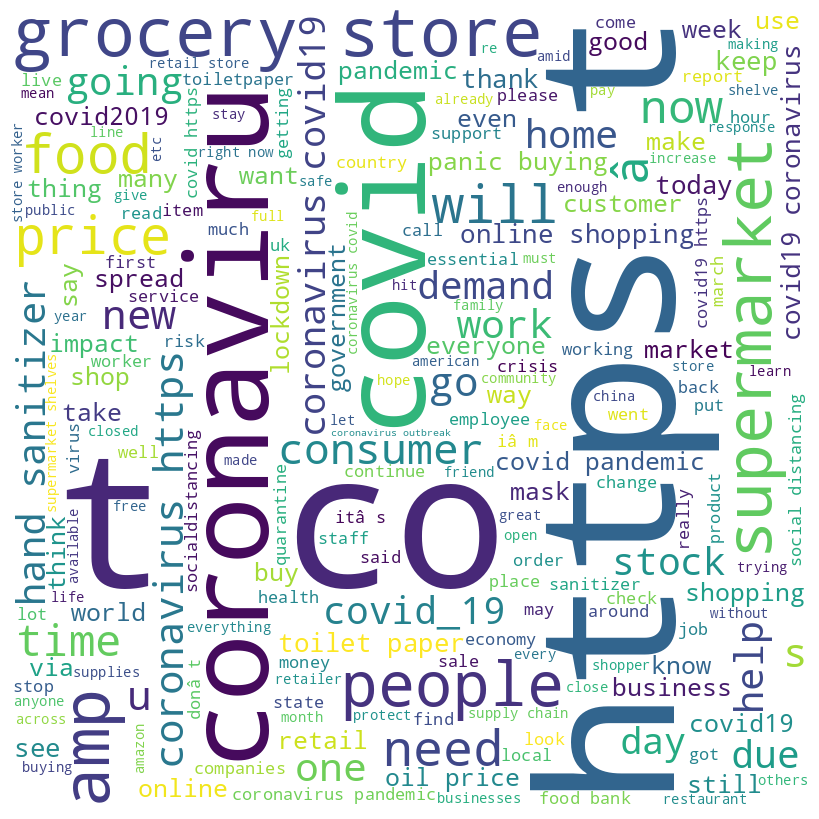

In [34]:
# Python program to generate WordCloud
  ## Based on https://www.geeksforgeeks.org/generating-word-cloud-python/
from wordcloud import WordCloud, STOPWORDS
comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in data.OriginalTweet:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()


##Story Generation and Visualization from Tweets

**Understanding the common words used in the tweets with respect to Sentiments**

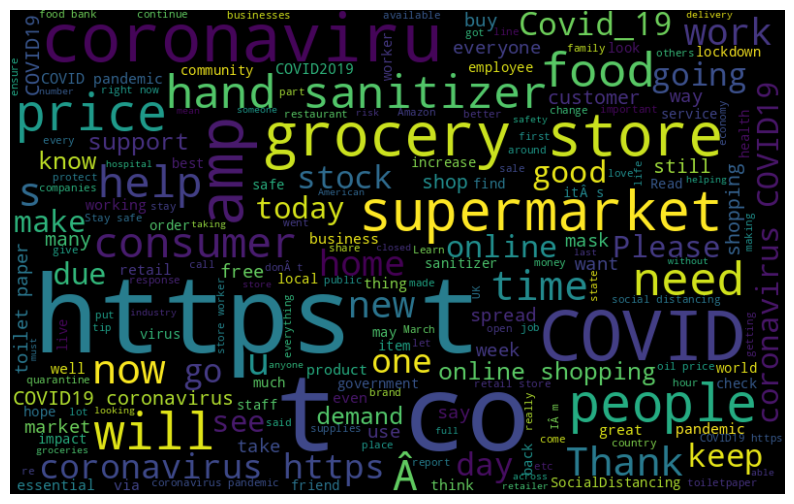

In [35]:
normal_words = ' '.join([text for text in data['OriginalTweet'][data['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

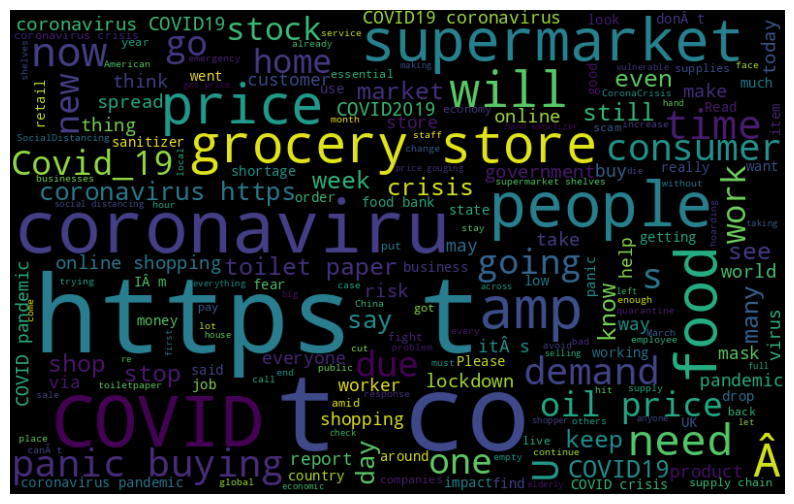

In [36]:
normal_words = ' '.join([text for text in data['OriginalTweet'][data['Sentiment'] == 'Negative']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

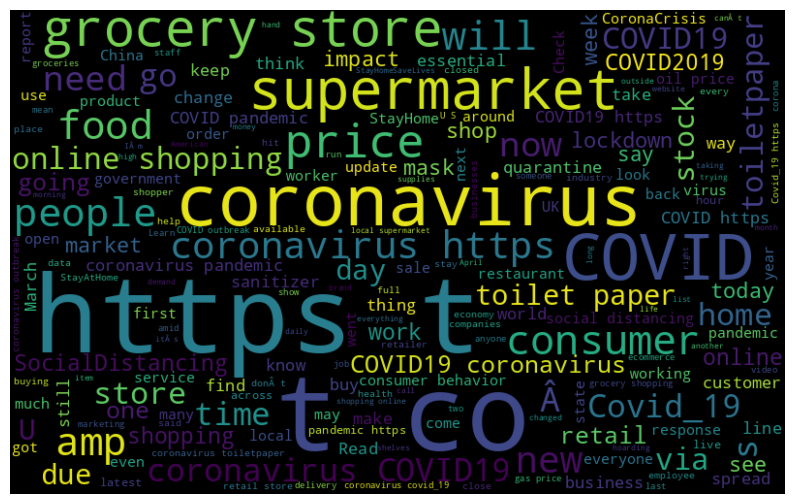

In [37]:
normal_words = ' '.join([text for text in data['OriginalTweet'][data['Sentiment'] == 'Neutral']])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [38]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


##Cleaning data - Tweets

###Removing Punctuation

**PUNCTUATION:** The marks, such as full stop, comma, and brackets, used in writing to separate sentences and their elements and to clarify meaning.

In [39]:
## Function to remove punctuation

def remove_punc(text):
  ''' function to remove punctuation'''

  import string

  # replacing the punctuations with no space
  translator = str.maketrans('','', string.punctuation)

  # return the text stripped of punctuation marks
  return text.translate(translator)

In [40]:
data['OriginalTweet'] = data['OriginalTweet'].apply(remove_punc)

In [41]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,MeNyrbie PhilGahan Chrisitv httpstcoiFz9FAn2Pa...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia Woolworths to give elder...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,As news of the regionÂs first confirmed COVID...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,Cashier at grocery store was sharing his insig...,Positive


##Remove stopwords

**STOPWORDS:** The stopwords are a list of words that are very very common but don’t provide useful information for most text analysis procedures.

In [42]:
## Function to remove stopwords

def remove_stopwords(text):
  ''' function to remove stopwords'''
  ## make text smallcase and then remove stopwords
  text = [word.lower() for word in text.split() if word.lower() not in stopwords]

  # joining the list of words with space separator
  return " ".join(text)


In [43]:
data['OriginalTweet'] = data['OriginalTweet'].apply(remove_stopwords)

In [44]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbie philgahan chrisitv httpstcoifz9fan2pa...,Neutral
1,3800,48752,UK,16-03-2020,advice talk neighbours family exchange phone n...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworths give elderly ...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,news regionâs first confirmed covid19 case ca...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier grocery store sharing insights covid19...,Positive


##Stemming

**Stemming:** Stemming is the process of producing morphological variants of a root/base word.

In [45]:
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [46]:
data['OriginalTweet']= data['OriginalTweet'].apply(stemming)

In [47]:
data.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,menyrbi philgahan chrisitv httpstcoifz9fan2pa ...,Neutral
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,Positive
2,3801,48753,Vagabonds,16-03-2020,coronavirus australia woolworth give elder dis...,Positive
5,3804,48756,"ÃT: 36.319708,-82.363649",16-03-2020,news regionâ first confirm covid19 case came ...,Positive
6,3805,48757,"35.926541,-78.753267",16-03-2020,cashier groceri store share insight covid19 pr...,Positive


**What is/are the insight(s) found from the chart?**                                            
We have removed all the stopwords, punctuation and stemming to reduce original tweet length and only keep what is important for our analysis.  

##Model Training

We will be using tf-idf method for vectorising the text,then we train 5 models namely Logistic Regression,Random Forest,Stochastic Gradient Descent,SVM and Passive Aggressive Classifier.We find that the Logistic Regression has the best accuracy score and thus we choose it for model building.

In [48]:
## defining Independent variable
X = data.OriginalTweet

## defining dependent variable
y = data.Sentiment

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=50)

In [50]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((26053,), (26053,), (6514,), (6514,))

##MODEL 1-LOGISTIC REGRESSION

In [51]:
tvec = TfidfVectorizer()
LR = LogisticRegression(solver='lbfgs', max_iter = 10000)

In [52]:
from sklearn.pipeline import Pipeline

model = Pipeline([('vectorizer',tvec),('classifier',LR)])
model.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', TfidfVectorizer()),
                ('classifier', LogisticRegression(max_iter=10000))])

In [53]:
## model prediction
y_pred = model.predict(X_test)

In [ ]:
#Plotting Confussion matrix
cf1a= (confusion_matrix(X_test,y_pred))
plt.figure(figsize=(8,5))
ax= plt.subplot()
sns.heatmap(cf1a, annot=True, fmt=".0f",ax = ax)

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=15)
ax.set_ylabel('Actual labels', fontsize=15)
ax.set_title('Confusion Matrix (Logistic Regg with TF/IDF)', fontsize=20)
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

##MODEL 2- PASSIVE AGGRESSIVE CLASSIFIER

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier()
model2 = Pipeline([('vectorizer',tvec),('classifier',pac)])
model2.fit(X_train, y_train)

In [ ]:
y_pred_pac=model2.predict(X_test)

##MODEL 3- STOCHASTIC GRADIENT DESCENT CLASSIFIER

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(loss = 'hinge', penalty = 'l2', random_state=0)

model3 = Pipeline([('vectorizer',tvec),('classifier',sgd_clf)])
model3.fit(X_train,y_train)
y_pred_sgd = model3.predict(X_test)

##MODEL 4 - SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

svc = SVC()

model4 = Pipeline([('vectorizer',tvec),('classifier',svc)])

In [ ]:
model4.fit(X_train,y_train)

In [ ]:
y_pred_svc = model4.predict(X_test)

##MODEL 5. RANDOM FOREST

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

In [ ]:
model5 = Pipeline([('vectorizer',tvec),('classifier',rf)])

In [ ]:
model5.fit(X_train, y_train)

In [ ]:
y_pred_rf = model5.predict(X_test)

##Performance Metrics and Accuracy

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

**Performance of logistic regression model**

In [ ]:
print('Accuracy :' ,accuracy_score(y_pred,y_test))
print('Precision :', precision_score(y_pred,y_test, average='weighted'))
print('Recall :', recall_score(y_pred,y_test, average='weighted'))

**Performance of passive aggressive classifier**

In [ ]:
print('Accuracy :' ,accuracy_score(y_pred_pac,y_test))
print('Precision :', precision_score(y_pred_pac,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_pac,y_test, average='weighted'))

**Performance of Stochastic gradient Descent Classifier**

In [ ]:
print('Accuracy :' ,accuracy_score(y_pred_sgd,y_test))
print('Precision :', precision_score(y_pred_sgd,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_sgd,y_test, average='weighted'))

**Performance of Support Vector Machine**

In [ ]:
print('Accuracy :' ,accuracy_score(y_pred_svc,y_test))
print('Precision :', precision_score(y_pred_svc,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_svc,y_test, average='weighted'))

**Performance of Random forest classifier**

In [ ]:
print('Accuracy :' ,accuracy_score(y_pred_rf,y_test))
print('Precision :', precision_score(y_pred_rf,y_test, average='weighted'))
print('Recall :', recall_score(y_pred_rf,y_test, average='weighted'))

##**CONCLUSION ON EDA**

1)Original Dataset contains 6 columns and 41157 rows.  
2)Location column contains approx 21% of Null values. so, we have dropped the NaN values.  
3)After dropping we have left with 32567 rows and 6 columns.  
4)In order to analyse the data we required only two columns "OriginalTweet" & "Sentiment".  
5)The columns such as “UserName” and “ScreenName” does not give any meaningful insights for our analysis.  
6)There are five types of sentiments- Extremely Negative, Negative, Neutral, Positive and Extremely Positive.  
7)All tweets data collected from the months of March and April 2020. Bar plot shows us the number of unique values in each column.  
8)Most of the tweets came from London followed by U.S.  

##**CONCLUSION ON MODEL TRAINING**

At the end we conclude our project with 5 models namely Logistic Regression,Random Forest,Stochastic Gradient Descent,SVM and Passive Aggressive Classifier.We are getting the highest accuracy of about 78% with Logistic Regression.We also tested our best models on some new tweet and the results are fairly accurate.